In [47]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from typing import List


# Create the tokenizer : Because your're going to convert every single word into its NUMBER representation

tokenizer : Tokenizer = Tokenizer(num_words=15, oov_token="<OOV/>")
tokenizer_lotsOfOOV : Tokenizer  = Tokenizer(num_words=4, oov_token="<OOV>")

teks : List[str] = [ "Saya suka programming ",
                     "Programming sangat menyenangkan",
                     "Machine learning berbeda dengan pemrograman konvensional"]

tokenizer_lotsOfOOV.fit_on_texts(teks)
tokenizer.fit_on_texts(teks) ## Tokenizer sudah memiliki representasi number ketika eksekusi line ini
sequences : List[List[int]] = tokenizer.texts_to_sequences(teks) # Ketika eksekusi ini, seluruh inputan akan dirubah menjadi representasi number yang telah di fit pada tokenizer sebelumnya
sequences_oov : List[List[int]] = tokenizer_lotsOfOOV.texts_to_sequences(teks)

print("Normal Sequence %s" % (sequences))
print("Lots off OOV %s" %(sequences_oov))


####### TO get the information about the CORPUS ( KAMUS kata ) 
print(tokenizer.word_index)
print(tokenizer.sequences_to_texts(sequences))


############################################################
##########################Padding penting untuk menyamakan resoulusi sebuah teks##################################
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

sequences_samaPanjang : List[List[int]] = pad_sequences(sequences,
                                                        padding="post",
                                                        maxlen = 3,
                                                        truncating="pre") # by default truncatingnya awal, so POST aja kalau mau akhir
print(sequences_samaPanjang)


####################################################  BINARY TEXT CLASSIFICATION ###############################################
total_words : int  = 15
embedding_dims : int = 3
input_length : int = 10
model : tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, embedding_dims,input_shape=(5,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=24, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=1, activation=tf.nn.sigmoid)
])

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer


NUM_WORDS : int = 250
EMBEDDING_DIMS : int = 3
MAX_LEN : int = 20
EPOCHS : int = 30
df : pd.DataFrame = pd.read_csv("yelp_labelled.txt", names=["sentence", "label"], sep="\t")

kalimat = df["sentence"].values
y = df["label"].values

x_train,x_test, y_train,y_test = train_test_split(kalimat, y, test_size=0.3)

tokenizer : Tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token="<OOV>")

tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

sequence_latih : List[List[int]] = tokenizer.texts_to_sequences(x_train)
sequence_test : List[List[int]] = tokenizer.texts_to_sequences(x_test)

####### Padded Materials !<< WELL make sure it is same resolution ####

padded_sequence_latih : List[List[int]] = pad_sequences(sequence_latih, maxlen=MAX_LEN)
padded_sequence_test : List[List[int]] = pad_sequences(sequence_test, maxlen=MAX_LEN)

model : tf.keras.models.Sequential = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(NUM_WORDS, EMBEDDING_DIMS, input_length=MAX_LEN),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(units=48, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units=24, activation=tf.nn.relu),
        tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
    ])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy()
    ]
)

num_epochs : int = 30
#history = model.fit(padded_sequence_latih, y_train,
#                    epochs=EPOCHS, batch_size=128,
#                    validation_data=(padded_sequence_test, y_test), verbose=2)

#

############################################################################################ MULTI CLASS TEXT CLASIFICATION ##########################################################################################################
print("\n\n\n\n\n")
df : pd.DataFrame = pd.read_csv("imdb_indonesian_movies_2.csv")
df  = df.drop("judul_film", axis=1)
print(df.shape)
MAX_WORDS : int = 5000
NUM_EMBEDDING : int = 3
MAX_LENGTH : int = 120
OOV_TOKEN : str = "<OOV>"
EPOCH : int = 50

## Convert Genre to one hot encoding
category_one_hot : pd.DataFrame = pd.get_dummies(df["genre"])
df_concat = pd.concat([df, category_one_hot], axis=1)
df_concat = df_concat.drop("genre", axis=1)

X : np.array = df_concat["ringkasan_sinopsis"].values
Y : np.array = df_concat[
    ["Drama", "Horor", "Komedi", "Laga", "Romantis"]
    ].values


x_train,x_test,y_train,y_test = train_test_split(X,Y , test_size=0.3, random_state= 0)

###### PADDING THE WHOLE INPUT
tokenizer : Tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token=OOV_TOKEN)

tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

sequence_train : List[List[int]] = tokenizer.texts_to_sequences(x_train)
sequence_test : List[List[int]] = tokenizer.texts_to_sequences(x_test)

padded_sequence_train : List[List[int]] = pad_sequences(sequence_train, truncating="post",
                                                        maxlen=MAX_LEN, padding="post")

padded_sequence_test : List[List[int]] = pad_sequences(sequence_test, truncating="post",
                                                        maxlen=MAX_LEN, padding="post")

############################################ MODELLING &  COMPILING ########################################
                                            
model : tf.keras.Sequential = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=MAX_WORDS, output_dim=NUM_EMBEDDING),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit(padded_sequence_train, y_train, validation_data=(padded_sequence_test, y_test), epochs=EPOCHS, batch_size=128, verbose=2)

## RIP OVERFITTING ! xD

Normal Sequence [[3, 4, 2], [2, 5, 6], [7, 8, 9, 10, 11, 12]]
Lots off OOV [[3, 1, 2], [2, 1, 1], [1, 1, 1, 1, 1, 1]]
{'<OOV/>': 1, 'programming': 2, 'saya': 3, 'suka': 4, 'sangat': 5, 'menyenangkan': 6, 'machine': 7, 'learning': 8, 'berbeda': 9, 'dengan': 10, 'pemrograman': 11, 'konvensional': 12}
['saya suka programming', 'programming sangat menyenangkan', 'machine learning berbeda dengan pemrograman konvensional']
[[ 3  4  2]
 [ 2  5  6]
 [10 11 12]]






(1005, 2)
negative    2532
positive    2468
Name: sentiment, dtype: int64
training begin
dict_keys([])
Epoch : 0 Loss None acc None
Epoch 1/100


KeyboardInterrupt: 

training begin
Epoch : 0 acc 0.7306397557258606 val_Loss 0.7654873728752136 val_acc 0.7368420958518982
Epoch : 1 acc 0.7542087435722351 val_Loss 0.7570436000823975 val_acc 0.7368420958518982
Epoch : 2 acc 0.7542087435722351 val_Loss 0.7588293552398682 val_acc 0.7368420958518982
Epoch : 3 acc 0.7542087435722351 val_Loss 0.7489340305328369 val_acc 0.7368420958518982
Epoch : 4 acc 0.7542087435722351 val_Loss 0.6500085592269897 val_acc 0.7368420958518982
Epoch : 5 acc 0.7600244879722595 val_Loss 0.529402494430542 val_acc 0.7515299916267395
Epoch : 6 acc 0.7927762269973755 val_Loss 0.5005436539649963 val_acc 0.7735618352890015
Epoch : 7 acc 0.8019589781761169 val_Loss 0.4833261966705322 val_acc 0.7735618352890015
Epoch : 8 acc 0.8151209354400635 val_Loss 0.4587133824825287 val_acc 0.7955936193466187
Epoch : 9 acc 0.8145087361335754 val_Loss 0.4480457007884979 val_acc 0.8127294778823853
Epoch : 10 acc 0.8267523646354675 val_Loss 0.4374218285083771 val_acc 0.8139534592628479
Epoch : 11 acc 0.

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


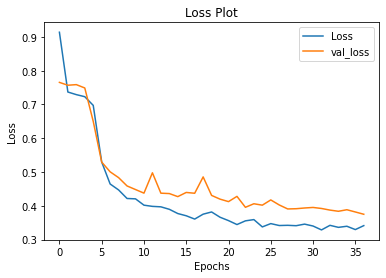

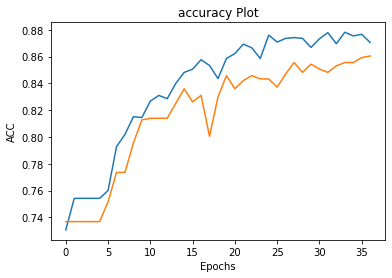

In [91]:
plot_accuracy(history.history)